# pset06: Student's game night
*by Xingyu (Luna) Li , Oct 14th, 2021*
  
## Background
Student uniformly samples a mean μ from 21 possible choices, and a standard deviation σ from 20 possible choices. From a normal distribution parameterized by μ and σ, he samples n numbers xi, i=1..n.
The game is to guess where what column the hidden dart is in: i.e., what the unknown mean μ is.

## 1. The Beginner's Game
During a beginner round, Student discloses what row the dart is in (what σ is), but not the column. So the game is to deduce μ, given known σ and the observed data x1..xn.

Text(-20.0, -3, 'true $\\mu$')

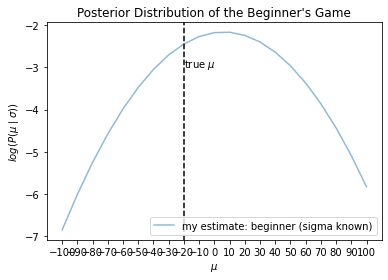

In [1]:
import numpy as np
import scipy.stats as stats
from scipy.special import logsumexp
import matplotlib.pyplot as plt
import seaborn as sns

# Set inputs
X          = np.array([ 11.50, -2.32, 9.18]) # n=3 observations
mus        = np.linspace(-100.,  100.0, 21)  # 21 possible mus
true_sigma = 60.                             # Student also tells us this in beginner's game
true_mu    = -20.                            # the unknown column position, mu

# Calculate the (log) posterior probability for each μ
def probdist_beginner_bayes(X,mus,true_sigma):
    num = np.zeros(len(mus))       # initialize the numerator
    for i, mu in enumerate(mus):
        num[i] = 0        # since the prior P(μ) is uniform, they will cancel out in the factorisation
        for x in X :                                       # calculate pdf for each observations and
            num[i] += stats.norm.logpdf(x, mu, true_sigma) # multiply them since they are independent
    post = num - logsumexp(num)            # normalize to the posterior probability
    return post
post_b = probdist_beginner_bayes(X,mus,true_sigma)

# Plot the distribution
fig,ax = plt.subplots()
ax.plot(mus, post_b, label="my estimate: beginner (sigma known)", alpha = 0.5)
ax.xaxis.set_ticks(mus)
ax.set(xlabel='$\mu$', ylabel='$log(P(\mu \mid \sigma))$')
ax.legend(loc="best")
ax.axvline(true_mu, color='k', ls='--')
plt.title("Posterior Distribution of the Beginner's Game")
plt.text(true_mu, -3, 'true $\mu$')

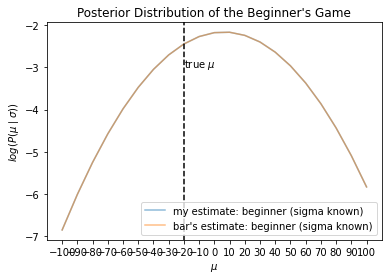

In [2]:
# Calculate betting odds using student's method
def probdist_beginner_student(X, sigma, mus):
    xbar = np.mean(X)
    N    = len(X)
    Pr   = [ stats.norm.logpdf(x, loc=xbar, scale= sigma / np.sqrt(N)) for x in mus ]  # proportional to std error of the mean
    Z    = logsumexp(Pr)             # normalization constant
    Pr   = [ p - Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr
post_s = probdist_beginner_student(X, true_sigma, mus)

# Plot the pub's probability distribution on the same semilog plot
def probdist_plot_beinner(post_b, post_s,mus,true_mu):
    fig,ax = plt.subplots()
    ax.plot(mus, post_b, label="my estimate: beginner (sigma known)", alpha = 0.5)
    ax.plot(mus, post_s, label="bar's estimate: beginner (sigma known)", alpha = 0.5)
    ax.xaxis.set_ticks(mus)
    ax.set(xlabel='$\mu$', ylabel='$log(P(\mu \mid \sigma))$')
    ax.legend(loc="best")
    ax.axvline(true_mu, color='k', ls='--')
    plt.title("Posterior Distribution of the Beginner's Game")
    plt.text(true_mu, -3, 'true $\mu$')
    plt.savefig("beginner.jpg")
probdist_plot_beinner(post_b, post_s,mus,true_mu)

The probability distribution calculated using our Bayesian inference method and Student's method turns out to be **identical** since the lines overlap with each other. 
  
Therefore, we may conclude that both methods do a great job of inferring the hidden column position of the dart -- the unknown μ, given the known row, σ.

## 2. The Advanced Game
In an advanced round, we have to deduce the column μ just from the observed data x1..xn; now σ is unknown.

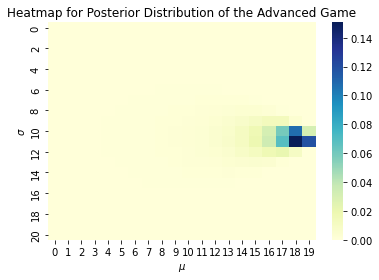

In [3]:
# Set inputs
X          = np.array([ 11.50, -2.32, 9.18]) # n=3 observations
mus        = np.linspace(-100.,  100.0, 21)  # 21 possible mus
sigmas     = np.linspace( 100.0,   5.0, 20)  # 21 possible sigmas
true_sigma = 60.                             # Student also tells us this in beginner's game
true_mu    = -20.                            # the unknown column position, mu

# Calculate the (log) posterior probability for each of the 20x21 possible values of σ,μ
def probdist_advanced_bayes(X,mus,sigmas):
    num = np.zeros((len(mus),len(sigmas))) # intialize the numerator
    for i, mu in enumerate(mus):
        for j,sigma in enumerate(sigmas):
            num[i][j] = 0          # since the prior P(μ) is uniform, they will cancel out in the factorisation
            for x in X :                                  # calculate pdf for each observations and
                num[i][j] += stats.norm.logpdf(x, mu, sigma) # multiply them since they are independent
    post = num - logsumexp(num)       # normalize to the posterior probability
    return post
post = probdist_advanced_bayes(X,mus,sigmas)

# Plot that 20x21 posterior distribution as a heat map
ax = sns.heatmap(np.exp(post),cmap="YlGnBu")
ax.set(xlabel='$\mu$', ylabel='$\sigma$') 
plt.title("Heatmap for Posterior Distribution of the Advanced Game")
plt.savefig("advanced_heatmap.jpg")

The heatmap shows us that the model of $\mu$ around 18 and $\sigma$ around 11 has the largest posterior probability.

Next, we want to calculate the marginal distribution by suming over the $\sigma$s to estimate the $\mu$ of our advanced game.

Text(0.5, 1.0, 'Posterior Distribution of the Advanced Game')

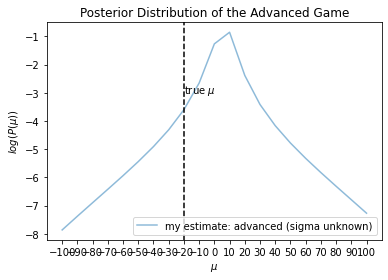

In [4]:
# Marginalize (sum over the rows) 
def margin_advanced_bayes(X,mus,sigmas):
    post = probdist_advanced_bayes(X,mus,sigmas)
    post_mu = logsumexp(post,axis=1)
    return post_mu
post_mu_b = margin_advanced_bayes(X,mus,sigmas)

# Plot the marginal distribution
fig,ax = plt.subplots()
ax.plot(mus, post_mu_b, label="my estimate: advanced (sigma unknown)", alpha = 0.5)
ax.xaxis.set_ticks(mus)
ax.set(xlabel='$\mu$', ylabel='$log(P(\mu))$')
ax.legend(loc="best")
ax.axvline(true_mu, color='k', ls='--')
plt.text(true_mu, -3, 'true $\mu$')
plt.title("Posterior Distribution of the Advanced Game")

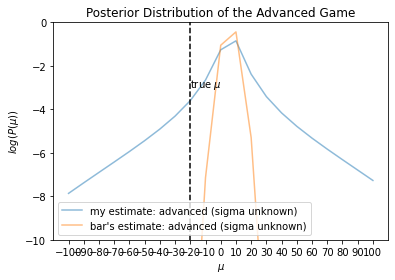

In [5]:
# Calculate betting odds using student's method
def probdist_advanced(X, mus):
    xbar = np.mean(X)
    s    = np.std(X, ddof=1)
    N    = len(X)
    Pr   = [ stats.norm.logpdf(x, loc=xbar, scale= s / np.sqrt(N)) for x in mus ]  # proportional to std error of the mean
    Z    = logsumexp(Pr)                   # normalization constant
    Pr   = [ p - Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr
post_mu_s = probdist_advanced(X, mus)

# Plot the pub's calculated probability distribution
def probdist_plot_advanced(post_mu_b, post_mu_s,mus,true_mu):
    fig,ax = plt.subplots()
    ax.plot(mus, post_mu_b, label="my estimate: advanced (sigma unknown)", alpha = 0.5)
    ax.plot(mus, post_mu_s, label="bar's estimate: advanced (sigma unknown)", alpha = 0.5)
    ax.xaxis.set_ticks(mus)
    ax.set(xlabel='$\mu$', ylabel='$log(P(\mu))$')
    ax.legend(loc="best")
    ax.axvline(true_mu, color='k', ls='--')
    plt.ylim(-10,0)
    plt.text(true_mu, -3, 'true $\mu$')
    plt.title("Posterior Distribution of the Advanced Game")
    plt.savefig("advanced.jpg")
probdist_plot_advanced(post_mu_b, post_mu_s,mus,true_mu)

For the advanced game, the probability distributions are similar around $\mu$ = 10, however, for other $\mu$s, our Bayesian inference method has a larger posterior probability than Student's method, even in the true $\mu$ = -20.

## 3. Where's the Advantage?

We may further use the Student's game script to generate data (and σ) to try our analysis out, for varying numbers of samples.

In [6]:
# Generate samples
! ./student-game.py 4

Welcome to Student's game night...

The RNG seed is 7425

The hidden grid has 20 rows for sigma 100.0..5.0,
                and 21 cols for mu -100.0..100.0.

Student picked grid col = 11, row = 12
and thus mu = 10.0, sigma = 40.0

Student's tea distribution machine shows the customers 4 samples:
    -40.95
     63.25
    -39.45
    -28.43

which give sample mean:   -11.40
   and sample std.dev.:    50.08
Figure(640x480)


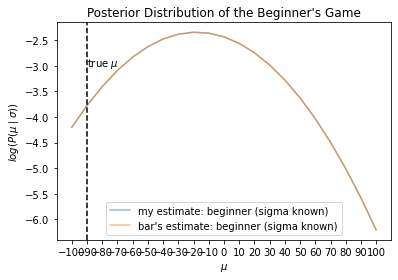

In [7]:
# One of the samples we get is: (The RNG seed is 7141)
X          = np.array([ -37.01, 59.05, -15.20, -79.20]) 
true_sigma = 85.                             
true_mu    = -90.     

# For the beginner's game:
post_b = probdist_beginner_bayes(X,mus,true_sigma)
post_s = probdist_beginner_student(X, true_sigma, mus)
probdist_plot_beinner(post_b, post_s,mus,true_mu)

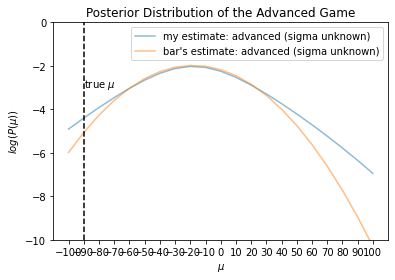

In [8]:
# For the advanced game:
post_mu_b = margin_advanced_bayes(X,mus,sigmas)
post_mu_s = probdist_advanced(X, mus)
probdist_plot_advanced(post_mu_b, post_mu_s,mus,true_mu)

After several attempts, we could conclude that our model and Student's model behaves similarly in the beginner's game. However, for the advanced game, Student's model has a same posterior probabilty to the Bayesian around the sample mean, but gets smaller more rapidly off the center.  

Therefore, **when the deviation between the sample mean and the true mean is large, our Bayesian statistical model has a higher probability to obtain the estimation of the true mean**, while Student underestimates the posterior probabilties and gives a higher fair odds, so we are likely to obtain a higher payout. 
  
    
Then reason behind this is that: if the population standard deviation $\sigma$ is known, then the mean $\mu$ has a normal (Z) distribution; If the population standard deviation $\sigma$ is unknown, then the mean $\mu$ has a Student's t distribution and the sample standard deviation is used instead of the population standard deviation. But these two standard deviations - sample and population standard deviations - are calculated differently.
  
In the formula for a population standard deviation, we divide by the population size N, whereas in the formula for the sample standard deviation, we divide by n−1 (the sample size minus one):  
  

$$\sigma = \sqrt{\frac{\sum (x_{i} - \mu)^{2}}{N}}$$   

$$s_{\bar{X}} = \sqrt{\frac{\sum (x_{i} - \bar{x})^{2}}{n - 1}}$$

  
The reason this is done is somewhat technical. Doing this makes the sample variance ${s^2}$ a so-called unbiased estimator for the population variance ${\sigma^2}$. In effect, if the population size is really large and we are doing many random samples of the same size n from that large population, the mean of the many values of ${s^2}$ will have an average very close to the value of ${\sigma^2}$. And, as far as a theoretical perspective goes, the mean of ${s^2}$ as a "random variable" will be exactly ${\sigma^2}$. 